In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('/kaggle/input/tsla2017-2022/TSLA(2).csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-09,23.309999,23.450001,22.844667,22.862667,22.862667,112405500
1,2017-10-10,23.120001,23.708668,23.035334,23.705999,23.705999,104677500
2,2017-10-11,23.592667,23.840000,23.410000,23.639999,23.639999,67512000
3,2017-10-12,23.530001,23.985332,23.509333,23.712000,23.712000,61305000
4,2017-10-13,23.798668,23.899332,23.578667,23.704666,23.704666,53107500
...,...,...,...,...,...,...,...
1253,2022-09-30,266.149994,275.570007,262.470001,265.250000,265.250000,67726600
1254,2022-10-03,254.500000,255.160004,241.009995,242.399994,242.399994,98363500
1255,2022-10-04,250.520004,257.500000,242.009995,249.440002,249.440002,109578500
1256,2022-10-05,245.009995,246.669998,233.270004,240.809998,240.809998,86982700


In [4]:
train_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [5]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
model = Sequential()#Adding the first LSTM layer and some Dropout regularisation

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))# Adding a second LSTM layer and some Dropout regularisation

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a third LSTM layer and some Dropout regularisation

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a fourth LSTM layer and some Dropout regularisation

model.add(LSTM(units = 50))
model.add(Dropout(0.2))# Adding the output layer

model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error' , metrics=['accuracy'])

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
24/24 [==============================] - 12s 20ms/step - loss: 0.0145 - accuracy: 0.0027
Epoch 2/20
24/24 [==============================] - 0s 15ms/step - loss: 0.0030 - accuracy: 0.0027
Epoch 3/20
24/24 [==============================] - 0s 15ms/step - loss: 0.0028 - accuracy: 0.0027
Epoch 4/20
24/24 [==============================] - 0s 15ms/step - loss: 0.0027 - accuracy: 0.0027
Epoch 5/20
24/24 [==============================] - 0s 15ms/step - loss: 0.0028 - accuracy: 0.0027
Epoch 6/20
24/24 [==============================] - 0s 15ms/step - loss: 0.0029 - accuracy: 0.0027
Epoch 7/20
24/24 [==============================] - 0s 15ms/step - loss: 0.0025 - accuracy: 0.0027
Epoch 8/20
24/24 [==============================] - 0s 15ms/step - loss: 0.0026 - accuracy: 0.0027
Epoch 9/20
24/24 [==============================] - 0s 15ms/step - loss: 0.0024 - accuracy: 0.0027
Epoch 10/20
24/24 [==============================] - 0s 15ms/step - loss: 0.0025 - accuracy: 0.0027
Epoch 11

In [7]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 518):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(458, 60, 1)


In [8]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

15/15 [==============================] - 2s 6ms/step


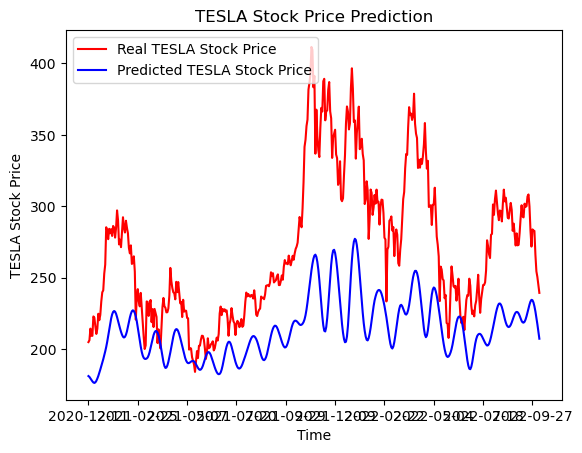

In [9]:
plt.plot(df.loc[800:, 'Date'], dataset_test.values , color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'], predicted_stock_price , color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()